In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm

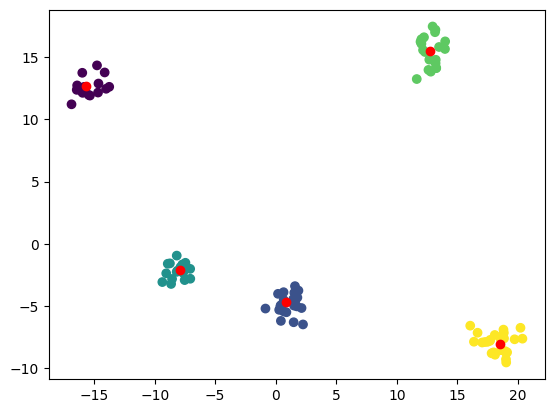

In [52]:
N_TOPICS = 5
VARIANCE = 10.
N_POINTS = 100
N_FEATURES = 2

topics = np.zeros((N_TOPICS, N_FEATURES))
assignments = np.zeros(N_POINTS, dtype=np.int32)
points = np.zeros((N_POINTS, N_FEATURES))

for k in range(N_TOPICS):
    topics[k] = np.random.normal(0, VARIANCE, (N_FEATURES,))

for i in range(N_POINTS):
    assignments[i] = np.random.choice(N_TOPICS)
    points[i] = np.random.normal(topics[assignments[i]], 1., (N_FEATURES,))

plt.scatter(*points[:, :2].T, c=assignments)
plt.scatter(*topics[:, :2].T, c='red')
plt.show()

100%|██████████| 100/100 [00:00<00:00, 24355.75it/s]


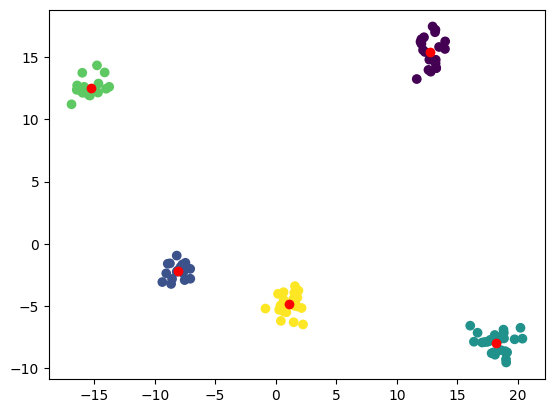

In [123]:
p = np.random.dirichlet(np.ones(N_TOPICS), N_POINTS)
m = np.random.normal(0., .1, (N_TOPICS, N_FEATURES))
s = 10.*np.ones(N_TOPICS)
elbo = []

for j in tqdm(range(100)):
    p = np.exp(points@m.T - ((m**2).sum(-1) + N_FEATURES*s.sum(-1))/2)
    p /= p.sum(-1)[:, None]
    m = p.T@points/(1/VARIANCE + p.sum(0)[:, None])
    s = 1/(1/VARIANCE + p.sum(0)[None])

plt.scatter(*points[:, :2].T, c=p.argmax(-1))
plt.scatter(*m[:, :2].T, c='red')
plt.show()